# Stochastic Weight Averaging Gaussian Mixtures (SWAGM)

In [2]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import operator

import os
import sys
import shutil
sys.path.append("../src") if "../src" not in sys.path else None 

# custom imports
from methods import *
from nnmodules import GenericDNN
from swag import *
from swagm import *
from evaluation import * 

In [12]:
m = torch.distributions.multivariate_normal.MultivariateNormal(torch.zeros(2), torch.eye(2))

In [13]:
torch.exp(m.log_prob(torch.zeros((10,2))))

tensor([0.1592, 0.1592, 0.1592, 0.1592, 0.1592, 0.1592, 0.1592, 0.1592, 0.1592,
        0.1592])

In [14]:
def pq(dim=2,bias=1,var=1):
    # dim = 2
    # bias = 4
    # bias = torch.zeros(dim)
    # bias[0] += 1
    # var = 1
    P = torch.distributions.multivariate_normal.MultivariateNormal(torch.zeros(dim), torch.eye(dim)) # true distribution
    Q = torch.distributions.multivariate_normal.MultivariateNormal(torch.zeros(dim)+bias, torch.eye(dim)*var)   # estimated distribution
    return P,Q

In [15]:
for dim in range(1,5):
    P,Q=pq(dim)
    print(torch.exp(P.log_prob(torch.zeros(dim)))*np.sqrt(dim))

tensor(0.3989)
tensor(0.2251)
tensor(0.1100)
tensor(0.0507)


In [16]:
bern = torch.distributions.bernoulli.Bernoulli(torch.tensor([0.5]))
bern.sample((10,))

tensor([[1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.]])

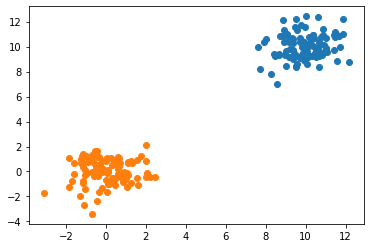

In [35]:
# create two samples from different distributions defined by P and Q,
# also visualize the samples (assumes 2D)
P,Q=pq(dim=2,bias=10,var=1)
X = Q.sample((100,))
Y = P.sample((100,))
plt.scatter(*X.T)
plt.scatter(*Y.T)

In [37]:
# calculate p-value for X and Y coming from the same distribution (i.e. H_0 => P and Q are the same dist)
permutation_test(X, Y, test_statistic=kernel_test_statistic, nsamples=1000)

tensor(0.)

In [23]:
# create two samples from different distributions defined by P and Q - when samples are HIGH DIMENSIONAL
P,Q=pq(dim=200,bias=10,var=1)
X = Q.sample((100,))
Y = P.sample((100,))
# calculate p-value for X and Y coming from the same distribution (i.e. H_0 => P and Q are the same dist)
permutation_test(X, Y, test_statistic=kernel_test_statistic, nsamples=1000)

tensor(1.)

In [189]:
"""
dim=1
P = torch.distributions.multivariate_normal.MultivariateNormal(torch.zeros(dim), torch.eye(dim)) # true distribution
torch.exp(P.log_prob(torch.zeros(dim)))
"""

'\ndim=1\nP = torch.distributions.multivariate_normal.MultivariateNormal(torch.zeros(dim), torch.eye(dim)) # true distribution\ntorch.exp(P.log_prob(torch.zeros(dim)))\n'

In [190]:
kldivs = []
kldiv = []
for dim in range(1,100,5):
    P,Q = pq(dim)
    for i in range(500):
        X = P.sample((10,))
        kldiv.append(KLdiv(X, P.log_prob, Q.log_prob))
    kldivs.append(np.mean(kldiv))
    
    print(f"{dim=}, {np.mean(kldiv)=}, {np.std(kldiv)=}")
    #print(np.mean(kldiv)*np.log(dim)/np.log(2))

dim=1, np.mean(kldiv)=22.390862, np.std(kldiv)=3.534857
dim=6, np.mean(kldiv)=11.315525, np.std(kldiv)=11.354082
dim=11, np.mean(kldiv)=7.543952, np.std(kldiv)=10.695466
dim=16, np.mean(kldiv)=5.6579638, np.std(kldiv)=9.82169
dim=21, np.mean(kldiv)=4.526371, np.std(kldiv)=9.0716305
dim=26, np.mean(kldiv)=3.7719762, np.std(kldiv)=8.451289
dim=31, np.mean(kldiv)=3.2331226, np.std(kldiv)=7.934923
dim=36, np.mean(kldiv)=2.8289819, np.std(kldiv)=7.4990625
dim=41, np.mean(kldiv)=2.5146506, np.std(kldiv)=7.125864
dim=46, np.mean(kldiv)=2.2631855, np.std(kldiv)=6.8021507
dim=51, np.mean(kldiv)=2.0574415, np.std(kldiv)=6.518148
dim=56, np.mean(kldiv)=1.8859881, np.std(kldiv)=6.266506
dim=61, np.mean(kldiv)=1.740912, np.std(kldiv)=6.041603
dim=66, np.mean(kldiv)=1.6165613, np.std(kldiv)=5.8390727
dim=71, np.mean(kldiv)=1.5087904, np.std(kldiv)=5.6554747
dim=76, np.mean(kldiv)=1.4144909, np.std(kldiv)=5.488055
dim=81, np.mean(kldiv)=1.3312856, np.std(kldiv)=5.3345885
dim=86, np.mean(kldiv)=1.2573

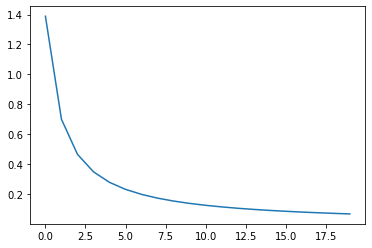

In [176]:
plt.plot(np.array(kldivs))

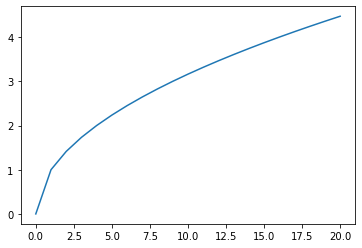

In [184]:
plt.plot(np.sqrt(np.linspace(0,20,21)))

In [ ]:
# [1,0,0,...] bias
dim=1, np.mean(kldiv)=1.3982627, np.std(kldiv)=0.55091137
dim=2, np.mean(kldiv)=1.0977017, np.std(kldiv)=0.5285902
dim=3, np.mean(kldiv)=0.8433431, np.std(kldiv)=0.5665252
dim=4, np.mean(kldiv)=0.6636317, np.std(kldiv)=0.58149254
dim=5, np.mean(kldiv)=0.53991246, np.std(kldiv)=0.5760199

# [1,1,1,...] bias
dim=1, np.mean(kldiv)=1.4068503, np.std(kldiv)=0.57712215
dim=2, np.mean(kldiv)=0.8960171, np.std(kldiv)=0.6657845
dim=3, np.mean(kldiv)=0.63522, np.std(kldiv)=0.6577229
dim=4, np.mean(kldiv)=0.4842951, np.std(kldiv)=0.62678564
dim=5, np.mean(kldiv)=0.38932285, np.std(kldiv)=0.5919233

In [4]:
catdist = torch.distributions.categorical.Categorical(torch.tensor([ 0.25, 0.25, 0.25, 0.25 ]))

In [11]:
catdist.sample((1,))

tensor([3])

### Initialize Data and Model

In [6]:
# choose dataset to use
dataset_name = 'yacht.txt'#'energy_heating_load.txt'#
datasets_path = '../datasets/'
dataset_path = datasets_path + dataset_name

# load data and create torch training data loader
(X_train, y_train), (X_test, y_test) = load_data(dataset_path)
trainloader = torch.utils.data.DataLoader(Dataset(X_train, y_train, dataset_name.split('.')[0]), 
                                         batch_size:=32, shuffle:=True)

# init model, criterion and optimizer
net = GenericDNN(input_size:=X_train.shape[-1], hidden_size:=input_size, output_size:=1)
criterion = torch.nn.MSELoss()#L1Loss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

### Choose whether to train weights (SWAG), and do inference

In [7]:
# Set 'train:=True' if model not previously trained, or want to train a new model
checkpoint_path = '../checkpoints/'
if train:=False:
    # delete previous checkpoints for model with current dataset
    if delete_previous_checkoints:=False:
        try:
            shutil.rmtree(checkpoint_path + trainloader.dataset.name)
        except FileNotFoundError:
            # can't delete non-existing file... just carry on
            pass
    
    # train and save weights
    train_swag(
        net,
        trainloader,
        optimizer,
        criterion,
        init_epochs=1000,
        sampling_epochs=5,
        nsamples=200,
        path_to_checkpoints="../checkpoints/",
    )

# Do inference (infer approximate sample mean and covariance of an assumed Guassian posterior)
theta_SWA, cov_diag, D = inference_swag(trainloader.dataset.name, checkpoint_path)

### Do predictions

In [8]:
# Do predictions
Lpi, Upi, mu_swa, mu_pred = monte_carlo_PI(trainloader.dataset[:][0], net, theta_SWA, cov_diag, 
                                            D, nsamples=50, percentile=0.9)

# invert prediction normalization
invert_normalization = lambda y: y * trainloader.dataset.stdy + trainloader.dataset.muy
Lpi, Upi, mu_swa, mu_pred, y_true = map(invert_normalization, (Lpi, Upi, mu_swa, mu_pred, trainloader.dataset[:][1]))

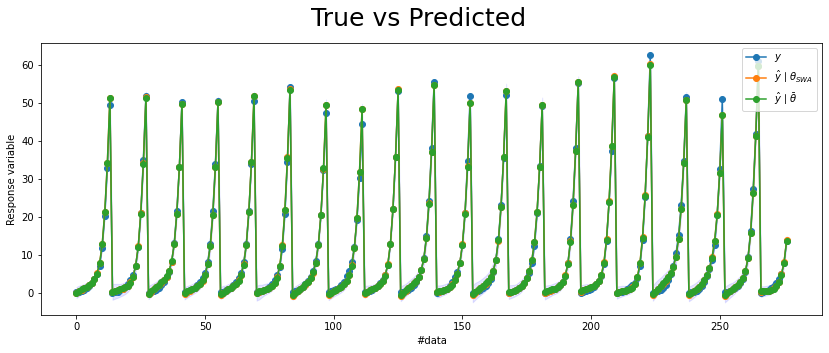

In [9]:
# plotting
fig, ax = plt.subplots(figsize=(14,5))
ax.plot(y_true, "-o", label="$y$")
ax.plot(mu_swa[:,0], "-o", label="$\\hat{y} \\mid \\theta_{SWA}$")
ax.plot(mu_pred[:,0], "-o", label="$\\hat{y} \\mid \\bar{\\theta}$")
ax.set_xlabel("#data")
ax.set_ylabel("Response variable")
ax.legend()
fig.suptitle("True vs Predicted", size=25)
ax.fill_between(np.arange(len(y_train)), Lpi[:,0], Upi[:,0], color='b', alpha=.1)

In [7]:
# evaluate model
print(f"{rmse(y_true, mu_swa)=}, {picp(Lpi, Upi, y_true)=}, {mpiw(Lpi, Upi)=}")

rmse(y_true, mu_swa)=0.66469944, picp(Lpi, Upi, y_true)=0.9458483754512635, mpiw(Lpi, Upi)=2.7661326


Text(0.5, 1.0, 'PI and PI upper and lower bound difference')

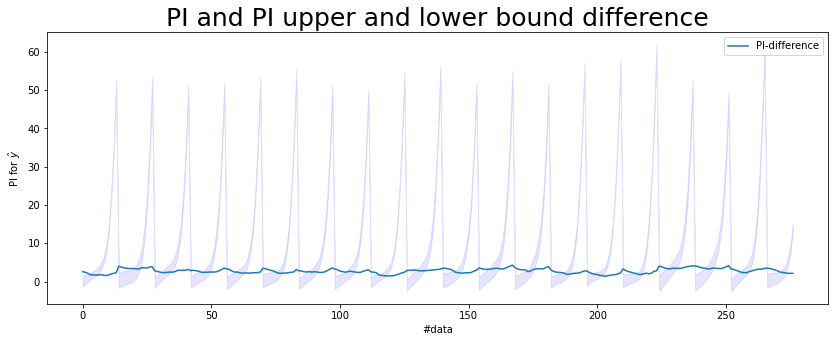

In [8]:
# Plot uncertainty curve and PI difference
# - We expect the PI to be wider where there is few data points, i.e. at the peaks of the "yatch.txt" 
# dataset, but the plot above does not seem to support this fact. However, when the graph "grows"
# quickly, the PI width appears thin, while it in reality is actually wider. 
# This can be seen from the follow plot: I.e. that the PI difference grows near the peaks, and
# becomes smaller near the troughs.
fig, ax = plt.subplots(figsize=(14,5))
ax.plot(Upi[:,0] - Lpi[:,0], label='PI-difference')
ax.fill_between(np.arange(len(y_train)), Lpi[:,0], Upi[:,0], color='b', alpha=.1)
ax.legend()
plt.xlabel('#data')
plt.ylabel('PI for $\hat{y}$')
plt.title('PI and PI upper and lower bound difference', size=25)

Text(0.5, 1.0, 'True vs Predicted')

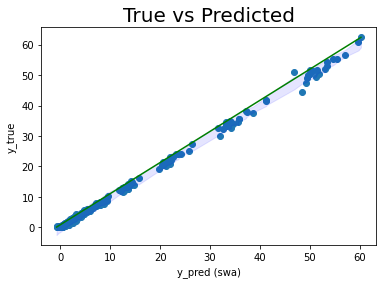

In [9]:
# plot pred and true against each other
plt.plot([np.min(mu_swa),np.max(mu_swa)], \
         [np.min(y_true.detach().numpy()),np.max(y_true.detach().numpy())], color="green")
plt.scatter(mu_swa[:,0], y_true[:,0])
plt.fill_between(np.sort(mu_swa[:,0]), np.sort(Lpi[:,0]), np.sort(Upi[:,0]), color='b', alpha=.1)
plt.xlabel('y_pred (swa)')
plt.ylabel('y_true')
plt.title('True vs Predicted',size=20)